# Network Intrusion Detection - Binomial

## Importing the Neccessary Liberaries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('max_columns', None)

In [3]:
datacols = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [4]:
df_train = pd.read_csv('Train.txt', names=datacols)

In [5]:
df_train.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.0,150,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.0,255,1,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.0,255,26,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,neptune,19


In [6]:
df_test = pd.read_csv('Test.txt', names=datacols)

In [7]:
df_test.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.0,1.0,1.0,0.04,0.06,0.0,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.0,1.0,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.0,1.0,1.0,0.01,0.06,0.0,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.0,1.0,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.0,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.0,0.0,normal,21


### Concatenating the train and test dataframes into one dataframe

In [8]:
df = pd.concat([df_train, df_test])

In [9]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


### Dropping the last_flag variable as it wouldn't serve any purpose in our cause

In [10]:
df.drop('last_flag', inplace=True, axis=1)

In [11]:
df.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.0,150,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.0,255,1,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.0,255,26,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,neptune


In [12]:
df.shape

(148517, 42)

## Mapping all the attacks to their respective attack classes

In [13]:
mapping = {'ipsweep': 'Probe','satan': 'Probe','nmap': 'Probe','portsweep': 'Probe','saint': 'Probe','mscan': 'Probe',
        'teardrop': 'DoS','pod': 'DoS','land': 'DoS','back': 'DoS','neptune': 'DoS','smurf': 'DoS','mailbomb': 'DoS',
        'udpstorm': 'DoS','apache2': 'DoS','processtable': 'DoS',
        'perl': 'U2R','loadmodule': 'U2R','rootkit': 'U2R','buffer_overflow': 'U2R','xterm': 'U2R','ps': 'U2R',
        'sqlattack': 'U2R','httptunnel': 'U2R',
        'ftp_write': 'R2L','phf': 'R2L','guess_passwd': 'R2L','warezmaster': 'R2L','warezclient': 'R2L','imap': 'R2L',
        'spy': 'R2L','multihop': 'R2L','named': 'R2L','snmpguess': 'R2L','worm': 'R2L','snmpgetattack': 'R2L',
        'xsnoop': 'R2L','xlock': 'R2L','sendmail': 'R2L',
        'normal': 'Normal'
        }

### df['attack'] now represents the Attack Class rather than the attacks themselves

In [14]:
df['attack'] = df['attack'].map(mapping)

## Since this is binomial classification Let's map all the attack classes to simply 'Attack' and 'Normal' to 'Normal'

In [15]:
map_binomial = {'DoS': 'Attack', 'Probe': 'Attack', 'R2L': 'Attack', 'U2R': 'Attack', 'Normal': 'Normal'}

In [16]:
df['attack'] = df['attack'].map(map_binomial)

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,148517.0,276.779305,2.460683e+03,0.0,0.00,0.00,0.00,5.771500e+04
src_bytes,148517.0,40227.949299,5.409612e+06,0.0,0.00,44.00,278.00,1.379964e+09
dst_bytes,148517.0,17088.853593,3.703525e+06,0.0,0.00,0.00,571.00,1.309937e+09
land,148517.0,0.000215,1.467714e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,148517.0,0.020523,2.400691e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,148517.0,0.000202,1.941708e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,148517.0,0.189379,2.013160e+00,0.0,0.00,0.00,0.00,1.010000e+02
num_failed_logins,148517.0,0.004323,7.224823e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,148517.0,0.402789,4.904606e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,148517.0,0.255062,2.223137e+01,0.0,0.00,0.00,0.00,7.479000e+03


### Let's drop the 'num_outbound_cmds' as all the values are zero

In [18]:
df['num_outbound_cmds'].value_counts()

0    148517
Name: num_outbound_cmds, dtype: int64

In [19]:
df.drop('num_outbound_cmds', inplace=True, axis=1)

### Dropping the Duplicates rows

In [20]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [21]:
df.shape

(147888, 41)

## Log-scaled distribution of attacks

Text(0.5, 1.0, 'Log Distribution of Attacks')

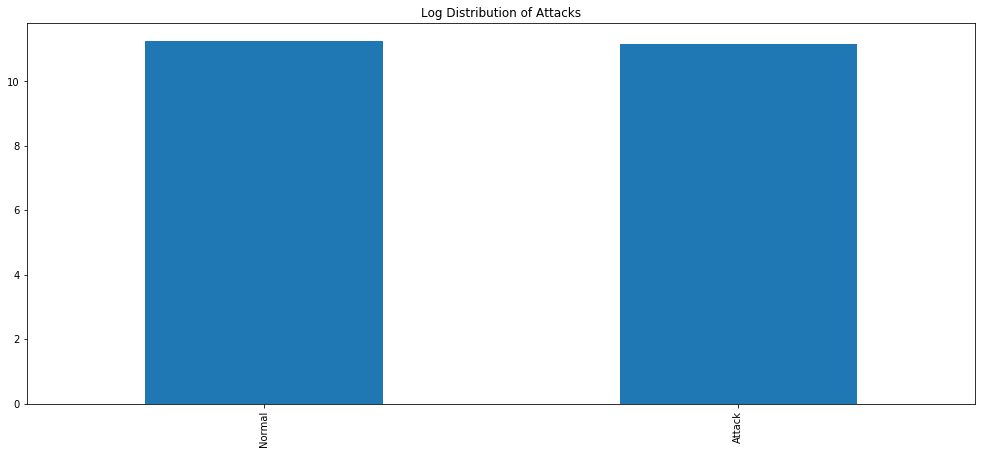

In [22]:
plt.figure(figsize=(17, 7))
df['attack'].value_counts().apply(np.log).plot(kind='bar')
plt.title('Log Distribution of Attacks')

In [23]:
df.isnull().sum().sum()

0

# Univariate Analysis
* **On Duration**

## Violin-plot

(array([0, 1]), <a list of 2 Text xticklabel objects>)

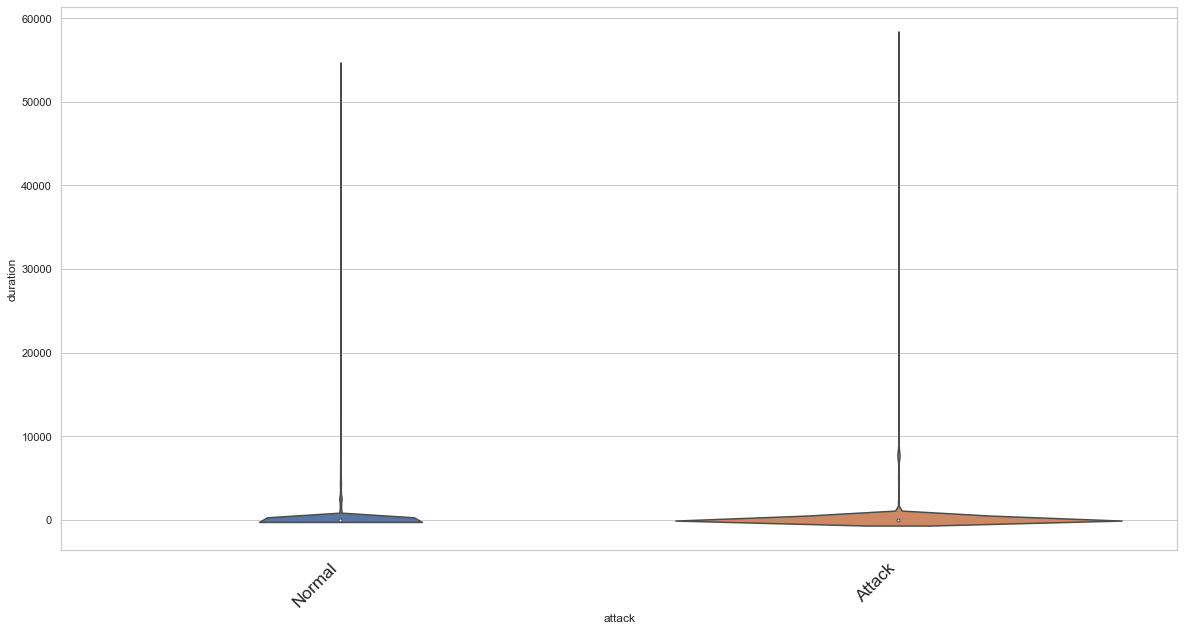

In [25]:
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
ax = sns.violinplot(x="attack", y="duration", data=df, fliersize=None)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

# Bi-variate Analysis

### Histograms

**On** 
- **Number of file creation operations in the connection,**
- **Number of shell prompts,** 
- **Number of operations on access control files, and**
- **Number of connections to the same destination host as the current connection in the past two seconds**

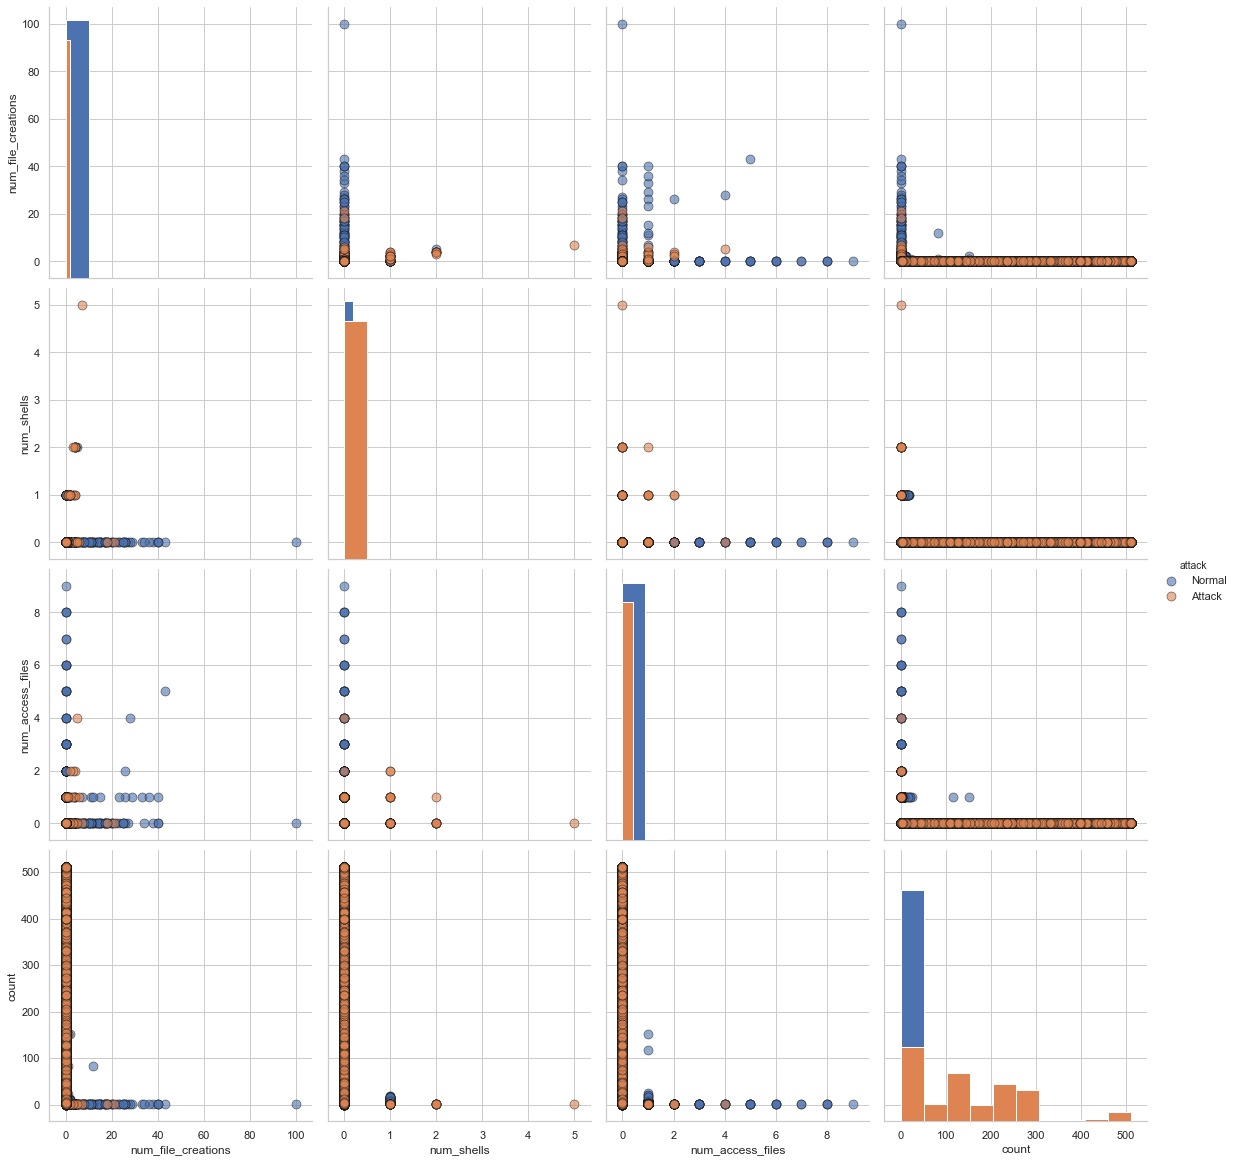

In [26]:
sns.pairplot(df, hue='attack', height=4, diag_kind='hist', vars=['num_file_creations', 'num_shells', 'num_access_files', 'count'], plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'})

**On** 
- **Number of connections to the same service (port number) as the current connection in the past two seconds,** 
- **The percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in count (23),** 
- **The percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in srv_count (24) , and** 
- **The percentage of connections that have activated the flag (4) REJ, among the connections aggregated in count (23)**

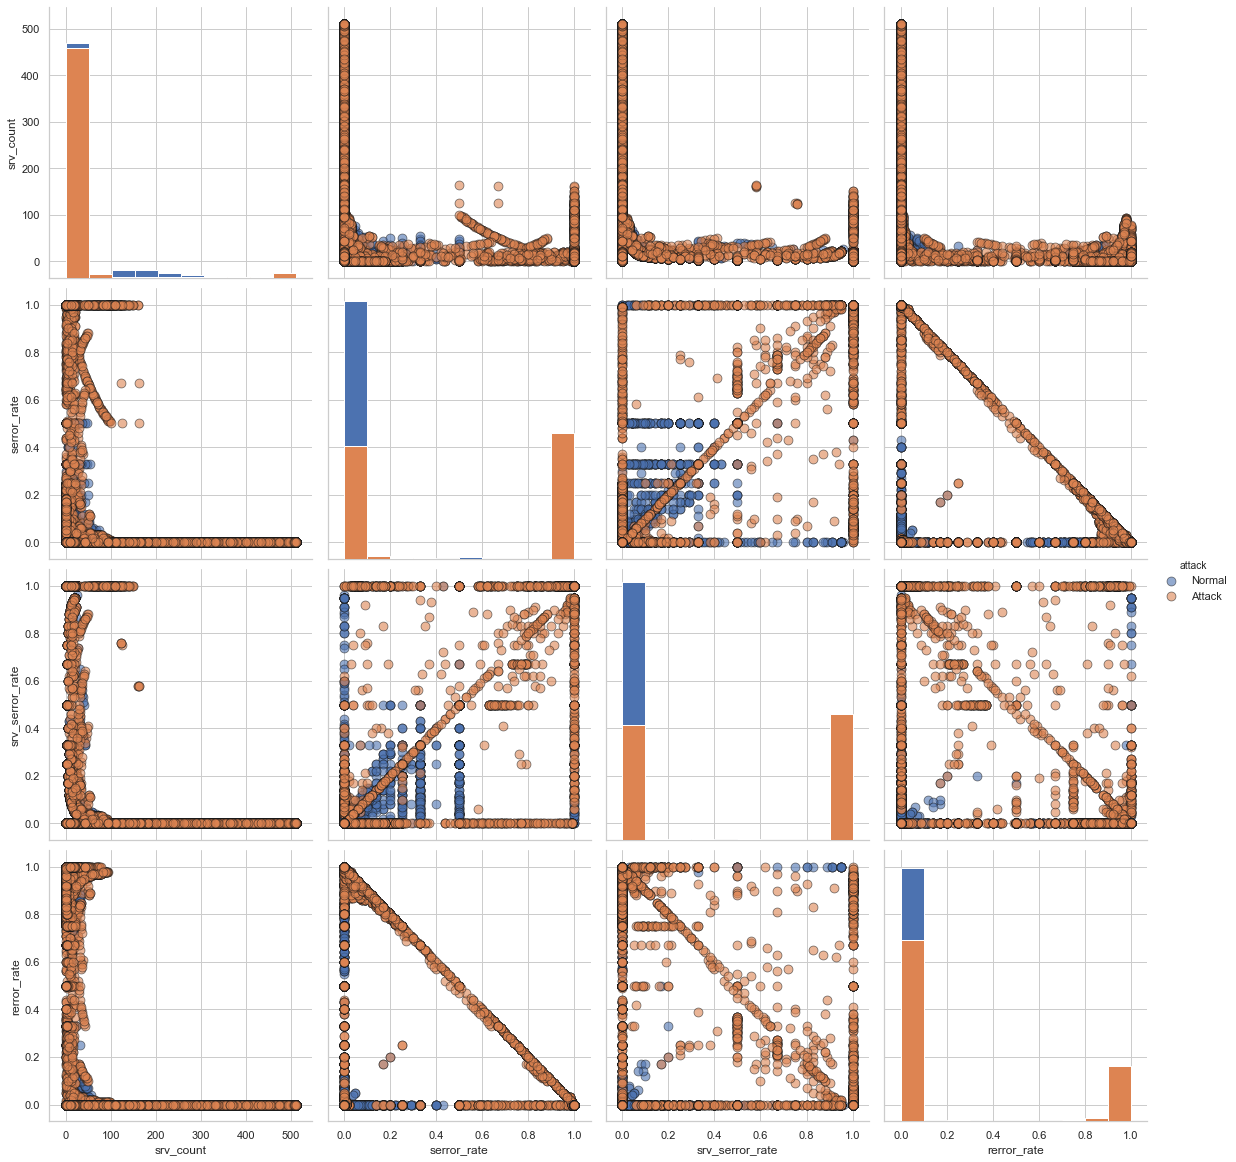

In [27]:
sns.pairplot(df, hue='attack', height=4, diag_kind='hist', vars=['srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate'], plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'})

# Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = df.drop('attack', axis=1)
y = df['attack']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.75)

In [31]:
X_train.shape

(110916, 40)

In [32]:
y_test.shape

(36972,)

In [33]:
X_test.shape

(36972, 40)

In [34]:
y_test.shape

(36972,)

# Vectorizing Categorical data

**protocol_type, service and flag are 3 categorical variables**

In [35]:
protocol = list(X_train['protocol_type'].values)
protocol = list(set(protocol))

In [36]:
protocol

['udp', 'tcp', 'icmp']

In [37]:
service = list(X_train['service'].values)
service = list(set(protocol))

In [38]:
service

['udp', 'tcp', 'icmp']

In [39]:
flag = list(X_train['flag'].values)
flag = list(set(flag))

In [40]:
flag

['SH', 'S2', 'RSTO', 'S1', 'S3', 'OTH', 'REJ', 'SF', 'RSTR', 'RSTOS0', 'S0']

### One Hot Encoder

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
one_hot = CountVectorizer(vocabulary=protocol, binary=True)
train_protocol = one_hot.fit_transform(X_train['protocol_type'].values)
test_protocol = one_hot.transform(X_test['protocol_type'].values)

In [43]:
one_hot = CountVectorizer(vocabulary=service, binary=True)
train_service = one_hot.fit_transform(X_train['service'].values)
test_service = one_hot.transform(X_test['service'].values)

In [44]:
one_hot = CountVectorizer(vocabulary=flag, binary=True)
train_flag = one_hot.fit_transform(X_train['flag'].values)
test_flag = one_hot.transform(X_test['flag'].values)

## Standardizing

#### feature_scaling() performs standardization on the features

In [45]:
def feature_scaling(X_train, X_test, feature_name):

    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler1 = scaler.fit_transform(X_train[feature_name].values.reshape(-1,1))
    scaler2 = scaler.transform(X_test[feature_name].values.reshape(-1,1))

    return scaler1, scaler2

In [46]:
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110916 entries, 51627 to 3191
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     110916 non-null  int64  
 1   protocol_type                110916 non-null  object 
 2   service                      110916 non-null  object 
 3   flag                         110916 non-null  object 
 4   src_bytes                    110916 non-null  int64  
 5   dst_bytes                    110916 non-null  int64  
 6   land                         110916 non-null  int64  
 7   wrong_fragment               110916 non-null  int64  
 8   urgent                       110916 non-null  int64  
 9   hot                          110916 non-null  int64  
 10  num_failed_logins            110916 non-null  int64  
 11  logged_in                    110916 non-null  int64  
 12  num_compromised              110916 non-null  int64  
 1

### Applying feature_scaling on all the continuous variables one-by-one

In [47]:
duration1, duration2 = feature_scaling(X_train, X_test, 'duration')
src_bytes1, src_bytes2 = feature_scaling(X_train, X_test, 'src_bytes')
dst_bytes1, dst_bytes2 = feature_scaling(X_train, X_test, 'dst_bytes')
land1, land2 = feature_scaling(X_train, X_test, 'land')
wrong_fragment1, wrong_fragment2 = feature_scaling(X_train, X_test, 'wrong_fragment')
urgent1, urgent2 = feature_scaling(X_train, X_test, 'urgent')
hot1, hot2 = feature_scaling(X_train, X_test, 'hot')
num_failed_logins1, num_failed_logins2 = feature_scaling(X_train, X_test, 'num_failed_logins')
logged_in1, logged_in2 = feature_scaling(X_train, X_test, 'logged_in')
num_compromised1, num_compromised2 = feature_scaling(X_train, X_test, 'num_compromised')
root_shell1, root_shell2 = feature_scaling(X_train, X_test, 'root_shell')
su_attempted1, su_attempted2 = feature_scaling(X_train, X_test, 'su_attempted')
num_root1, num_root2 = feature_scaling(X_train, X_test, 'num_root')
num_file_creations1, num_file_creations2 = feature_scaling(X_train, X_test, 'num_file_creations')
num_shells1, num_shells2 = feature_scaling(X_train, X_test, 'num_shells')
num_access_files1, num_access_files2 = feature_scaling(X_train, X_test, 'num_access_files')
is_host_login1, is_host_login2 = feature_scaling(X_train, X_test, 'is_host_login')
is_guest_login1, is_guest_login2 = feature_scaling(X_train, X_test, 'is_guest_login')
count1, count2 = feature_scaling(X_train, X_test, 'count')
srv_count1, srv_count2 = feature_scaling(X_train, X_test, 'srv_count')
serror_rate1, serror_rate2 = feature_scaling(X_train, X_test, 'serror_rate')
srv_serror_rate1, srv_serror_rate2 = feature_scaling(X_train, X_test, 'srv_serror_rate')
rerror_rate1, rerror_rate2 = feature_scaling(X_train, X_test, 'rerror_rate')
srv_rerror_rate1, srv_rerror_rate2 = feature_scaling(X_train, X_test, 'srv_rerror_rate')
same_srv_rate1, same_srv_rate2 = feature_scaling(X_train, X_test, 'same_srv_rate')
diff_srv_rate1, diff_srv_rate2 = feature_scaling(X_train, X_test, 'diff_srv_rate')
srv_diff_host_rate1, srv_diff_host_rate2 = feature_scaling(X_train, X_test, 'srv_diff_host_rate')
dst_host_count1, dst_host_count2 = feature_scaling(X_train, X_test, 'dst_host_count')
dst_host_srv_count1, dst_host_srv_count2 = feature_scaling(X_train, X_test, 'dst_host_srv_count')
dst_host_same_srv_rate1, dst_host_same_srv_rate2 = feature_scaling(X_train, X_test, 'dst_host_same_srv_rate')
dst_host_diff_srv_rate1, dst_host_diff_srv_rate2 = feature_scaling(X_train, X_test, 'dst_host_diff_srv_rate')
dst_host_same_src_port_rate1, dst_host_same_src_port_rate2 = feature_scaling(X_train, X_test, 'dst_host_same_src_port_rate')
dst_host_srv_diff_host_rate1, dst_host_srv_diff_host_rate2 = feature_scaling(X_train, X_test, 'dst_host_srv_diff_host_rate')
dst_host_serror_rate1, dst_host_serror_rate2 = feature_scaling(X_train, X_test, 'dst_host_serror_rate')
dst_host_srv_serror_rate1, dst_host_srv_serror_rate2 = feature_scaling(X_train, X_test, 'dst_host_srv_serror_rate')
dst_host_rerror_rate1, dst_host_rerror_rate2 = feature_scaling(X_train, X_test, 'dst_host_rerror_rate')
dst_host_srv_rerror_rate1, dst_host_srv_rerror_rate2 = feature_scaling(X_train, X_test, 'dst_host_srv_rerror_rate')

## Joining the Categorical and Continuous variables using HStack

In [48]:
from scipy.sparse import hstack

In [49]:
X_train_1 = hstack((duration1, train_protocol, train_service, train_flag, src_bytes1, dst_bytes1, 
                    land1, wrong_fragment1, urgent1, hot1, num_failed_logins1, logged_in1, 
                    num_compromised1, root_shell1, su_attempted1, num_root1, num_file_creations1, 
                    num_shells1, num_access_files1, is_host_login1, is_guest_login1, count1, 
                    srv_count1, serror_rate1, srv_serror_rate1, rerror_rate1, srv_rerror_rate1, 
                    same_srv_rate1, diff_srv_rate1, srv_diff_host_rate1, dst_host_count1, dst_host_srv_count1, 
                    dst_host_same_srv_rate1, dst_host_diff_srv_rate1, dst_host_same_src_port_rate1, 
                    dst_host_srv_diff_host_rate1, dst_host_serror_rate1, dst_host_srv_serror_rate1, 
                    dst_host_rerror_rate1, dst_host_srv_rerror_rate1))

In [50]:
X_test_1 = hstack((duration2, test_protocol, test_service, test_flag, src_bytes2, dst_bytes2, 
                   land2, wrong_fragment2, urgent2, hot2, num_failed_logins2, logged_in2, 
                   num_compromised2, root_shell2, su_attempted2, num_root2, num_file_creations2, 
                   num_shells2, num_access_files2, is_host_login2, is_guest_login2, count2, 
                   srv_count2, serror_rate2, srv_serror_rate2, rerror_rate2, srv_rerror_rate2, 
                   same_srv_rate2, diff_srv_rate2, srv_diff_host_rate2, dst_host_count2, 
                   dst_host_srv_count2, dst_host_same_srv_rate2, dst_host_diff_srv_rate2, 
                   dst_host_same_src_port_rate2, dst_host_srv_diff_host_rate2, dst_host_serror_rate2, 
                   dst_host_srv_serror_rate2, dst_host_rerror_rate2, dst_host_srv_rerror_rate2))

In [51]:
df['attack'].value_counts()

Normal    76967
Attack    70921
Name: attack, dtype: int64

### confusion_matrix_func() prints a confusion matrix heatmap that will help us to determine how well the model has been able to classify the data points belonging to different categories

In [52]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
def confusion_matrix_func(Y_test, y_test_pred):

    C = confusion_matrix(Y_test, y_test_pred)
    cm_df = pd.DataFrame(C)
    labels = ['Normal', 'Attack']
    plt.figure(figsize=(20,15))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g',       xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    
    plt.show()

C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


### model() Fits the model on train data and predict the performance on train and test data.

In [53]:
def model(model_name, X_train, Y_train, X_test, Y_test):
    print('Fitting the model and prediction on train data:')
    start = dt.datetime.now()
    model_name.fit(X_train, Y_train)
    y_tr_pred = model_name.predict(X_train)
    print('Completed')
    print('Time taken:',dt.datetime.now()-start)
    print('='*50)

    results_tr = dict()
    y_tr_pred = model_name.predict(X_train)    
    results_tr['precision'] = precision_score(Y_train, y_tr_pred, average='weighted')
    results_tr['recall'] = recall_score(Y_train, y_tr_pred, average='weighted')
    results_tr['f1_score'] = f1_score(Y_train, y_tr_pred, average='weighted')

    results_test = dict()
    print('Prediction on test data:')
    start = dt.datetime.now()
    y_test_pred = model_name.predict(X_test)
    print('Completed')
    print('Time taken:',dt.datetime.now()-start)
    print('='*50)

    print('Performance metrics:')
    print('='*50)
    print('Confusion Matrix is:')
    confusion_matrix_func(Y_test, y_test_pred)
    print('='*50)
    results_test['precision'] = precision_score(Y_test, y_test_pred, average='weighted')
    print('Precision score is:')
    print(precision_score(Y_test, y_test_pred, average='weighted'))
    print('='*50)
    results_test['recall'] = recall_score(Y_test, y_test_pred, average='weighted')
    print('Recall score is:')
    print(recall_score(Y_test, y_test_pred, average='weighted'))
    print('='*50)
    results_test['f1_score'] = f1_score(Y_test, y_test_pred, average='weighted')
    print('F1-score is:')
    print(f1_score(Y_test, y_test_pred, average='weighted'))
    # add the trained  model to the results
    results_test['model'] = model

    return results_tr, results_test

### print_grid_search_attributes() prints all the grid search attributes

In [54]:
def print_grid_search_attributes(model):
    
    print('---------------------------')
    print('|      Best Estimator     |')
    print('---------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))
    # parameters that gave best results while performing grid search
    print('---------------------------')
    print('|     Best parameters     |')
    print('---------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))
    #  number of cross validation splits
    print('----------------------------------')
    print('|   No of CrossValidation sets   |')
    print('----------------------------------')
    print('\n\tTotal number of cross validation sets: {}\n'.format(model.n_splits_))
    # Average cross validated score of the best estimator, from the Grid Search 
    print('---------------------------')
    print('|        Best Score       |')
    print('---------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

# Gaussian Naive Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB

### Hyperparameter

In [56]:
hp = {'var_smoothing':[10**x for x in range(-9,3)]}

#### Creating an instance of GaussianNB()

In [57]:
nb = GaussianNB()

In [58]:
nb_grid = GridSearchCV(nb, param_grid=hp, cv=5, verbose=1, n_jobs=-1)

Fitting the model and prediction on train data:
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    7.7s finished


Completed
Time taken: 0:00:08.569246
Prediction on test data:
Completed
Time taken: 0:00:00.085002
Performance metrics:
Confusion Matrix is:


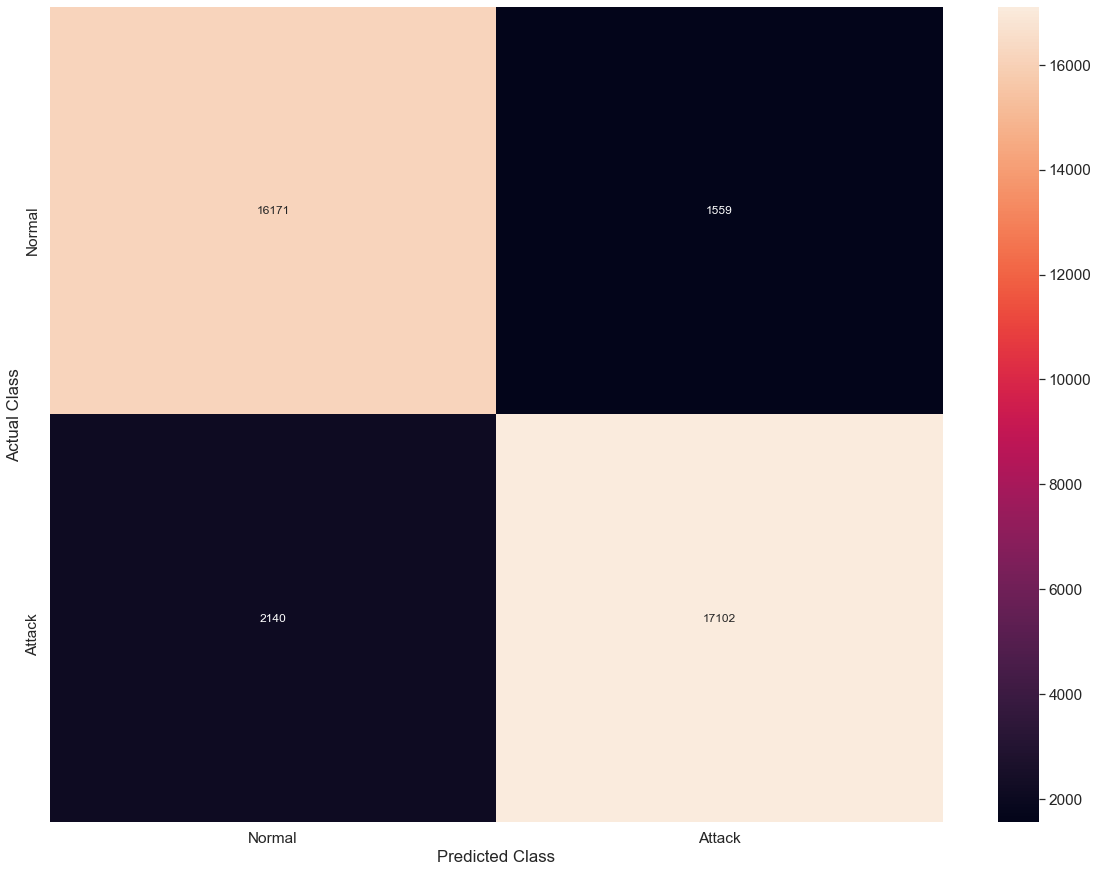

Precision score is:
0.9004750257384405
Recall score is:
0.8999513145082765
F1-score is:
0.8999909301579373


In [59]:
nb_grid_results = model(nb_grid, X_train_1.toarray(), y_train, X_test_1.toarray(), y_test)

In [60]:
print_grid_search_attributes(nb_grid)

---------------------------
|      Best Estimator     |
---------------------------

	GaussianNB(priors=None, var_smoothing=0.0001)

---------------------------
|     Best parameters     |
---------------------------
	Parameters of best estimator : 

	{'var_smoothing': 0.0001}

----------------------------------
|   No of CrossValidation sets   |
----------------------------------

	Total number of cross validation sets: 5

---------------------------
|        Best Score       |
---------------------------

	Average Cross Validate scores of best estimator : 

	0.9003570182096245



# Decision Tree Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier

### Hyperparameter

In [62]:
hyperparameter = {'max_depth':[5, 10, 20, 50, 100, 500], 'min_samples_split':[5, 10, 100, 500]}

### Creating an instance of DecisionTreeClassifier()

In [63]:
decision_tree = DecisionTreeClassifier(criterion='gini', splitter='best',class_weight='balanced')

In [64]:
decision_tree_grid = GridSearchCV(decision_tree, param_grid=hyperparameter, cv=3, verbose=1, n_jobs=-1)

Fitting the model and prediction on train data:
Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   20.5s finished


Completed
Time taken: 0:00:22.464058
Prediction on test data:
Completed
Time taken: 0:00:00.024794
Performance metrics:
Confusion Matrix is:


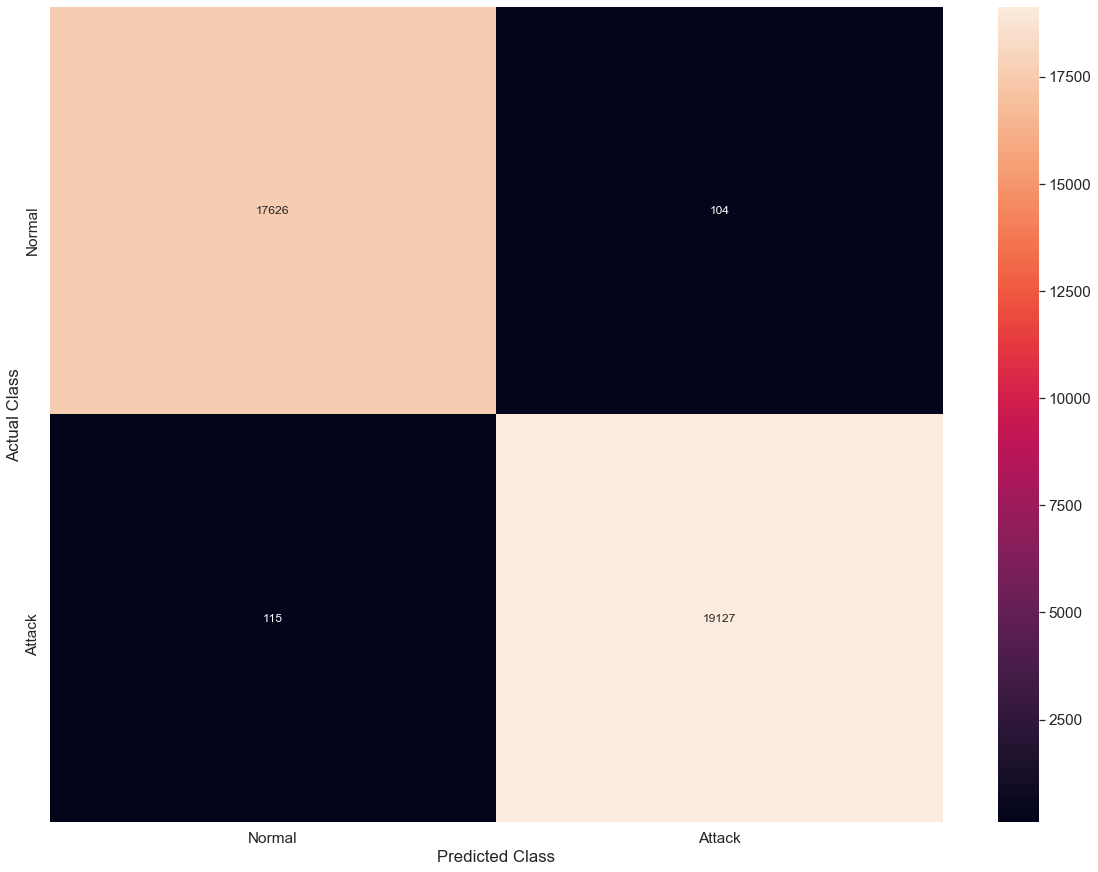

Precision score is:
0.994076918112991
Recall score is:
0.9940765985069783
F1-score is:
0.9940766701732916


In [65]:
decision_tree_grid_results = model(decision_tree_grid, X_train_1.toarray(), y_train, X_test_1.toarray(), y_test)

In [66]:
print_grid_search_attributes(decision_tree_grid)

---------------------------
|      Best Estimator     |
---------------------------

	DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

---------------------------
|     Best parameters     |
---------------------------
	Parameters of best estimator : 

	{'max_depth': 20, 'min_samples_split': 5}

----------------------------------
|   No of CrossValidation sets   |
----------------------------------

	Total number of cross validation sets: 3

---------------------------
|        Best Score       |
---------------------------

	Average Cross Validate scores of best estimator : 

	0.9930938728407083

